In [1]:
from selenium import webdriver
browser = webdriver.Chrome('./chromedriver')

In [2]:
target_countries = ['japan', 'united-states-of-america', 'united-kingdom', 'australia', 'india', 'china', 'south-korea']
elem_names = []
elem_rates = []

for target_county in target_countries:
    url = 'https://gs.statcounter.com/social-media-stats/all/{}'.format(target_county)
    browser.get(url)
    
    elem_table = browser.find_element_by_class_name('stats-snapshot')
    elem_rows = elem_table.find_elements_by_class_name('col')
    _elem_name = []
    _elem_rate = []
    
    for elem_row in elem_rows:
        elem_name = elem_row.find_element_by_tag_name('th').text
        elem_rate = float(elem_row.find_element_by_tag_name('td').text.replace('%', ''))

        _elem_name.append(elem_name)
        _elem_rate.append(elem_rate)
    
    elem_names.append(_elem_name)
    elem_rates.append(_elem_rate)

In [4]:
import pandas as pd
elem_country_names = ['日本', 'アメリカ', 'イギリス', 'オーストラリア', 'インド', '中国', '韓国']
df = pd.DataFrame(elem_names, index=elem_country_names, columns=['1位', '2位', '3位', '4位', '5位', '6位'])

df.to_csv('sns-occupancy-rank.csv')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as dt
%matplotlib inline

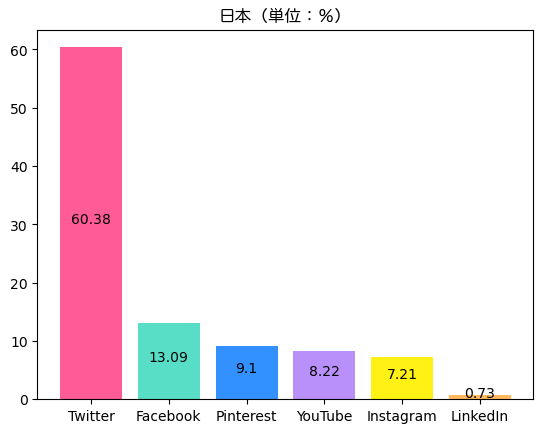

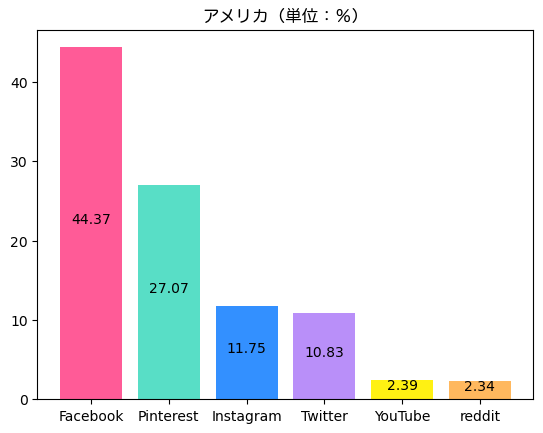

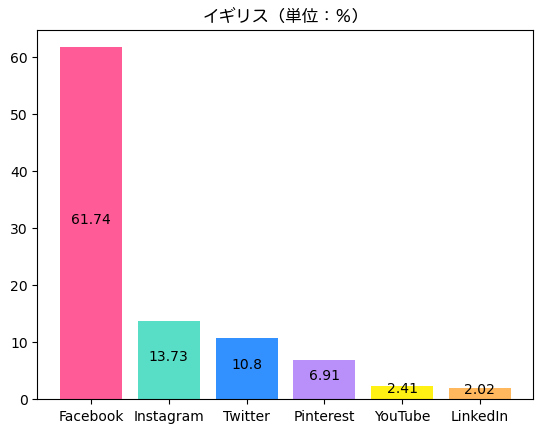

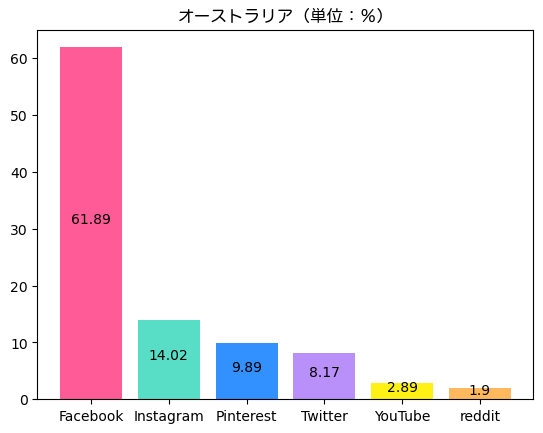

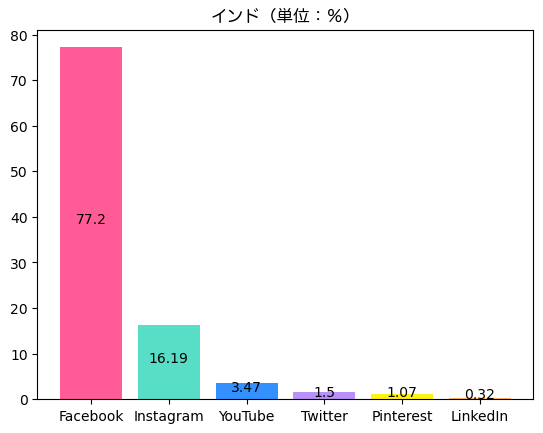

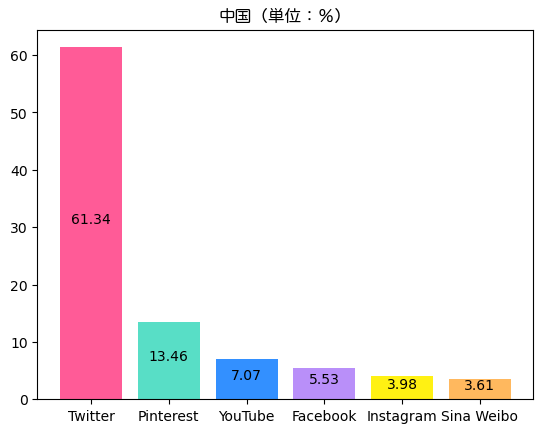

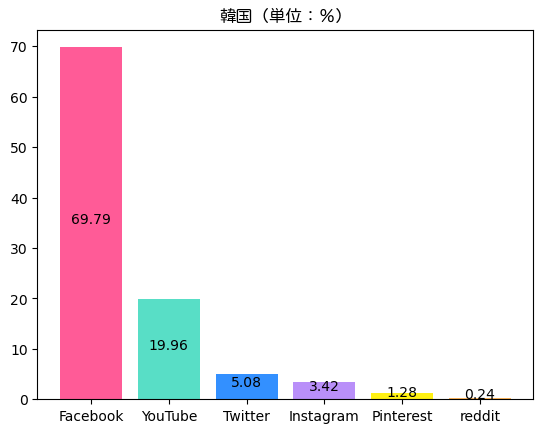

In [6]:
colorlist = ['#FF5B97', '#58DEC6', '#3390FF', '#B98FF9', '#FFF113', '#FFB85E']

def add_rate_label(x_list, y_list):
    for i in range(1, len(x_list) + 1):
        plt.text(i - 1, y_list[i - 1] / 2, y_list[i - 1], ha="center")

for index, elem_country_name in enumerate(elem_country_names):
    names = elem_names[index]
    rates = elem_rates[index]
    sort_rates = sorted(rates)[::-1]
    plt.bar(names, sort_rates, width=0.8, color=colorlist)
    add_rate_label(names, sort_rates)
    plt.title(elem_country_names[index] + '（単位：％）', fontname="Hiragino Maru Gothic Pro")

    plt.savefig('graph-image/{}.png'.format(target_countries[index]))
    plt.show()

In [7]:
from PIL import Image
import openpyxl
file_name = "sns-occupancy-rate.xlsx"
workbook = openpyxl.Workbook(file_name)
workbook.save(file_name)

In [8]:
workbook = openpyxl.load_workbook(file_name)
sheet = workbook.active
columns = ['A2', 'F2', 'K2', 'P2', 'A16', 'F16', 'K16']

for index, target_country in enumerate(target_countries):
    image_name = 'graph-image/{}.png'.format(target_country)
    image = Image.open(image_name)
    resize_image = image.resize((320, 240))
    resize_image.save(image_name)
    attach_image = openpyxl.drawing.image.Image(image_name)
    sheet.add_image(attach_image, columns[index])
    
workbook.save(file_name)

In [52]:
browser.quit()